<a href="https://colab.research.google.com/github/Fr4nT1c86/hello-world-flutter/blob/master/Meyr_Fernando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# vamos criar dois padroes
#letra A
A = np.array([
    [1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1]
]).reshape(-1)
#letra Z
Z = np.array([
    [ 1,-1, 1],
    [-1, 1,-1],
    [ 1,-1, 1]
]).reshape(-1)

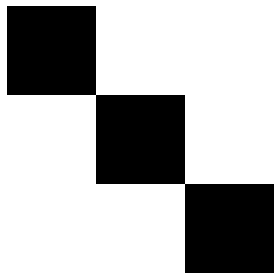

In [5]:
# Mostrar Letras A
ordem_matriz = 3
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(A.reshape(ordem_matriz, ordem_matriz), cmap='bone_r')
ax.set_axis_off()
f.tight_layout()

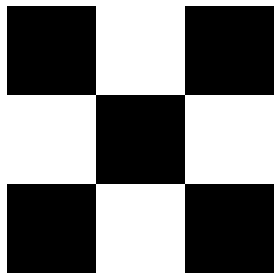

In [6]:
# Mostrar Letras Z
ordem_matriz = 3
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(Z.reshape(ordem_matriz, ordem_matriz), cmap='bone_r')
ax.set_axis_off()
f.tight_layout()

In [7]:
#treinamento da rede com os dois padroes
X = np.array([A, Z])
m, n_units = np.shape(X)
weights = np.zeros((n_units, n_units))
for x in X:
    weights += np.outer(x, x) / m   # produto de dois veores
weights[np.diag_indices(n_units)] = 0  # insere zeros na diagonal principal

weights

array([[ 0., -1.,  0., -1.,  1., -1.,  0., -1.,  1.],
       [-1.,  0.,  0.,  1., -1.,  1.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-1.,  1.,  0.,  0., -1.,  1.,  0.,  1., -1.],
       [ 1., -1.,  0., -1.,  0., -1.,  0., -1.,  1.],
       [-1.,  1.,  0.,  1., -1.,  0.,  0.,  1., -1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  1., -1.,  1.,  0.,  0., -1.],
       [ 1., -1.,  0., -1.,  1., -1.,  0., -1.,  0.]])

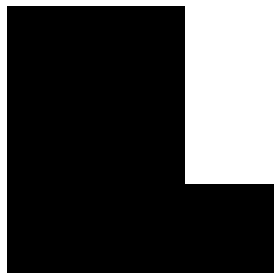

In [8]:
# criar padrao de teste
teste = np.array([
    [ 1, 1,-1],
    [ 1, 1,-1],
    [ 1, 1, 1]
]).reshape(-1)
# reshape(-1) transforma a matriz em um vetor unico
teste
#mostra teste
ordem_matriz = 3
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(teste.reshape(ordem_matriz, ordem_matriz), cmap='bone_r')
ax.set_axis_off()
f.tight_layout()

In [9]:
#Testa a rede com o padrao
n_iter = 3  # numero de iteraçoes
soft = False  # pode usa tangente (true) como função de ativação ou degrau (false)
Xteste = teste
Xs = [None] * n_iter
for i in range(n_iter):
      Xteste = np.dot(Xteste, weights)
      if soft:
          Xteste = np.tanh(Xteste)
      else:
          Xteste[Xteste < 0] = -1
          Xteste[Xteste >= 0] = 1
      Xs[i] = - Xteste
Xteste

array([ 1., -1.,  1., -1.,  1., -1., -1., -1.,  1.])

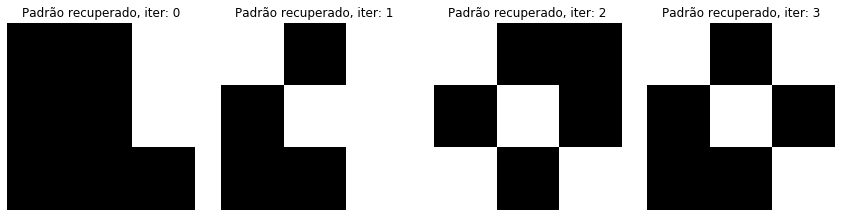

In [10]:
#mostra teste final
x_hats = Xs
f, axes = plt.subplots(1, n_iter+1, figsize=((n_iter+1)*3, 3))
x_hats.insert(0, teste)
for i in range(n_iter+1):
    axes[i].imshow(x_hats[i].reshape(ordem_matriz, ordem_matriz), cmap='bone_r')
    axes[i].set_axis_off()
    axes[i].set_title(f'Padrão recuperado, iter: {i}')
f.tight_layout()